### Student Information
Name:

Student ID:

GitHub ID:

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [23]:
### Begin Assignment Here
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Download NLTK resources
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ All libraries loaded successfully")

✓ All libraries loaded successfully


## 1. Data Preparation

Load the Reddit stock sentiment dataset


In [24]:
# Load the Reddit stock sentiment dataset
df = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')

print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
df.head()


Dataset Shape: (847, 16)

Column Names:
['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url', 'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities', 'label']

First 5 rows:


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


In [25]:
# Basic data information
print("=== Dataset Basic Information ===")
print(f"Total records: {len(df)}")
print(f"Total columns: {len(df.columns)}")
print("\nData types:")
print(df.dtypes)
print("\nBasic statistics:")
df.describe()


=== Dataset Basic Information ===
Total records: 847
Total columns: 16

Data types:
type             object
datetime         object
post_id          object
subreddit        object
title            object
author           object
url              object
upvotes           int64
downvotes       float64
upvote_ratio    float64
text             object
subjectivity    float64
polarity        float64
sentiment       float64
entities         object
label           float64
dtype: object

Basic statistics:


,upvotes,downvotes,upvote_ratio,subjectivity,polarity,sentiment,label
count,847.000000,64.000000,64.000000,847.000000,847.000000,847.000000,847.000000
mean,12.262102,0.265625,0.981406,0.346768,0.036116,0.144038,-0.243211
std,142.126337,1.461052,0.068147,0.317261,0.297814,0.767566,0.664801
min,-74.000000,0.000000,0.500000,0.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000
50%,1.000000,0.000000,1.000000,0.366667,0.000000,0.000000,0.000000
75%,4.000000,0.000000,1.000000,0.577500,0.150000,1.000000,0.000000
max,3943.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2. Data Transformation

Convert and simplify the dataset - keep only necessary columns for analysis


In [26]:
# Simplify dataset - select key columns: text, label, type, subreddit
X = df[['type', 'subreddit', 'text', 'polarity', 'sentiment', 'label']].copy()

# Create sentiment label names for better readability
sentiment_map = {-1.0: 'Negative', 0.0: 'Neutral', 1.0: 'Positive'}
X['sentiment_label'] = X['label'].map(sentiment_map)

print("Simplified dataset shape:", X.shape)
print("\nFirst 10 rows:")
X.head(10)


Simplified dataset shape: (847, 7)

First 10 rows:


,type,subreddit,text,polarity,sentiment,label,sentiment_label
0,comment,wallstreetbets,Calls on retards,-0.900000,-1.0,-1.0,Negative
1,comment,wallstreetbets,Stunt as in like why did they even make a big ...,0.083333,1.0,0.0,Neutral
2,comment,StockMarket,Seeing lots of red in the ticker.,0.000000,0.0,0.0,Neutral
3,post,stockstobuytoday,Vision Marine Technologies Inc. is rewriting t...,0.216383,1.0,1.0,Positive
4,comment,StockMarket,He didn’t say thank you.,0.000000,0.0,-1.0,Negative
5,comment,wallstreetbets,"Hoping to ejaculate in wet warm puss tonight, ...",0.250000,1.0,0.0,Neutral
6,comment,stocks,Trump will respond to china increasing their t...,-0.108333,-1.0,-1.0,Negative
7,comment,wallstreetbets,Confirmed not a trap. Its been like this for p...,0.050000,1.0,0.0,Neutral
8,comment,stocks,Am I the only one seeing the cup & handle brea...,0.057045,1.0,1.0,Positive
9,comment,stockstobuytoday,HLGN is $10. Hurry and catch it now before it ...,0.000000,0.0,1.0,Positive


In [27]:
# Query examples - familiarizing with the data
print("=== Query Examples ===")

# Query first 10 records with specific columns
print("\n1. First 10 records (text and sentiment_label):")
print(X[:10][["text", "sentiment_label"]])

# Query records of specific sentiment
print("\n2. First 5 Negative sentiment records:")
print(X[X['sentiment_label'] == 'Negative'].head(5)[["text", "sentiment_label"]])

# Query using iloc (by position)
print("\n3. Every 5th record (first 5):")
print(X.iloc[::5].head(5)[["text", "sentiment_label"]])


=== Query Examples ===

1. First 10 records (text and sentiment_label):
                                                text sentiment_label
0                                   Calls on retards        Negative
1  Stunt as in like why did they even make a big ...         Neutral
2                  Seeing lots of red in the ticker.         Neutral
3  Vision Marine Technologies Inc. is rewriting t...        Positive
4                           He didn’t say thank you.        Negative
5  Hoping to ejaculate in wet warm puss tonight, ...         Neutral
6  Trump will respond to china increasing their t...        Negative
7  Confirmed not a trap. Its been like this for p...         Neutral
8  Am I the only one seeing the cup & handle brea...        Positive
9  HLGN is $10. Hurry and catch it now before it ...        Positive

2. First 5 Negative sentiment records:
                                                 text sentiment_label
0                                    Calls on retards      

## 3. Data Mining with Pandas

### 3.1 Dealing with Missing Values


In [28]:
# Check for missing values
print("=== Missing Values Analysis ===")
missing_values = X.isnull().sum()
missing_percentage = (missing_values / len(X)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage (%)': missing_percentage
})
print(missing_df)

# Visualize missing values (only if there are missing values)
if missing_percentage[missing_percentage > 0].shape[0] > 0:
    plt.figure(figsize=(10, 5))
    missing_percentage[missing_percentage > 0].plot(kind='bar', color='coral')
    plt.title('Missing Values Percentage', fontsize=14, fontweight='bold')
    plt.xlabel('Columns')
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("\n✓ No missing values found - No visualization needed")

print(f"\nTotal missing values: {missing_values.sum()}")


=== Missing Values Analysis ===
                 Missing Count  Missing Percentage (%)
type                         0                     0.0
subreddit                    0                     0.0
text                         0                     0.0
polarity                     0                     0.0
sentiment                    0                     0.0
label                        0                     0.0
sentiment_label              0                     0.0

✓ No missing values found - No visualization needed

Total missing values: 0


In [29]:
# Handle missing values - drop rows with missing text (core data for analysis)
print("Before handling missing values:", len(X))

# Drop rows where text is missing (text is essential for our analysis)
X = X.dropna(subset=['text']).copy()

print("After handling missing values:", len(X))
print("\nRemaining missing values:")
print(X.isnull().sum())


Before handling missing values: 847
After handling missing values: 847

Remaining missing values:
type               0
subreddit          0
text               0
polarity           0
sentiment          0
label              0
sentiment_label    0
dtype: int64


### 3.2 Dealing with Duplicate Data


In [30]:
# Check for duplicates
print("=== Duplicate Data Analysis ===")
print(f"Duplicate rows (all columns): {X.duplicated().sum()}")
print(f"Duplicate rows (based on text): {X.duplicated(subset=['text']).sum()}")

# Remove duplicates based on text column
before_drop = len(X)
X = X.drop_duplicates(subset=['text'], keep='first').copy()
after_drop = len(X)

print(f"\nBefore removing duplicates: {before_drop}")
print(f"After removing duplicates: {after_drop}")
print(f"Duplicates removed: {before_drop - after_drop}")


=== Duplicate Data Analysis ===
Duplicate rows (all columns): 23
Duplicate rows (based on text): 23

Before removing duplicates: 847
After removing duplicates: 824
Duplicates removed: 23


## 4. Data Preprocessing

### 4.1 Label Distribution Analysis


=== Sentiment Label Distribution ===
sentiment_label
Neutral     401
Negative    315
Positive    108
Name: count, dtype: int64

Proportions:
sentiment_label
Neutral     0.486650
Negative    0.382282
Positive    0.131068
Name: proportion, dtype: float64


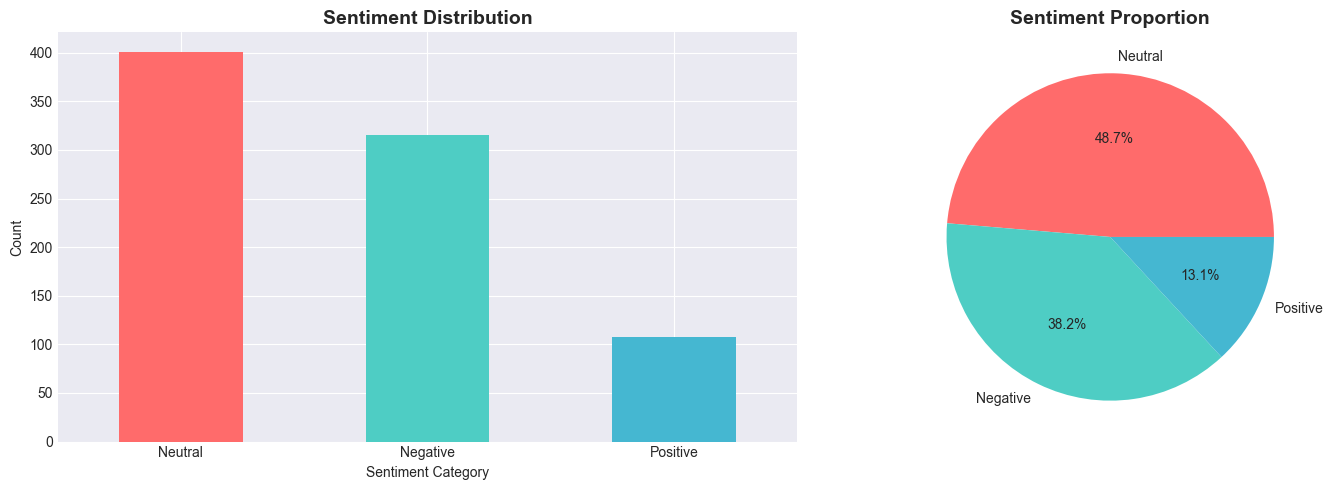

In [31]:
# Analyze sentiment label distribution
print("=== Sentiment Label Distribution ===")
label_counts = X['sentiment_label'].value_counts()
print(label_counts)
print("\nProportions:")
print(X['sentiment_label'].value_counts(normalize=True))

# Visualize label distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart
X['sentiment_label'].value_counts().plot(kind='bar', ax=axes[0], color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0].set_title('Sentiment Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sentiment Category')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)

# Pie chart
X['sentiment_label'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                                          colors=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[1].set_title('Sentiment Proportion', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


### 4.2 Sampling

Create stratified sampling to balance the dataset


In [32]:
# Stratified sampling to create a balanced dataset
from sklearn.model_selection import train_test_split

# Sample equal numbers from each sentiment category (take minimum count)
min_samples = X['sentiment_label'].value_counts().min()
print(f"Minimum samples per category: {min_samples}")

# Sample from each category
X_balanced = X.groupby('sentiment_label').apply(lambda x: x.sample(n=min(len(x), 300), random_state=42)).reset_index(drop=True)

print(f"\nOriginal dataset size: {len(X)}")
print(f"Balanced dataset size: {len(X_balanced)}")
print("\nBalanced distribution:")
print(X_balanced['sentiment_label'].value_counts())


Minimum samples per category: 108

Original dataset size: 824
Balanced dataset size: 708

Balanced distribution:
sentiment_label
Negative    300
Neutral     300
Positive    108
Name: count, dtype: int64


### 4.3 Feature Creation

Create new features from text data


New features created:
                                                text  text_length  word_count  \
0  China has been preparing for this and this adm...          371          56   
1  Do we have a copy of trump’s kindergarten grad...           96          15   
2  It was so blatant.  In a normal version of the...          211          37   
3  "hmm. Trade War with China sounds good."\n\n" ...          314          54   
4               I’m tired. The US is a goddamn joke.           36           8   

   avg_word_length  
0         5.625000  
1         5.466667  
2         4.648649  
3         4.759259  
4         3.625000  


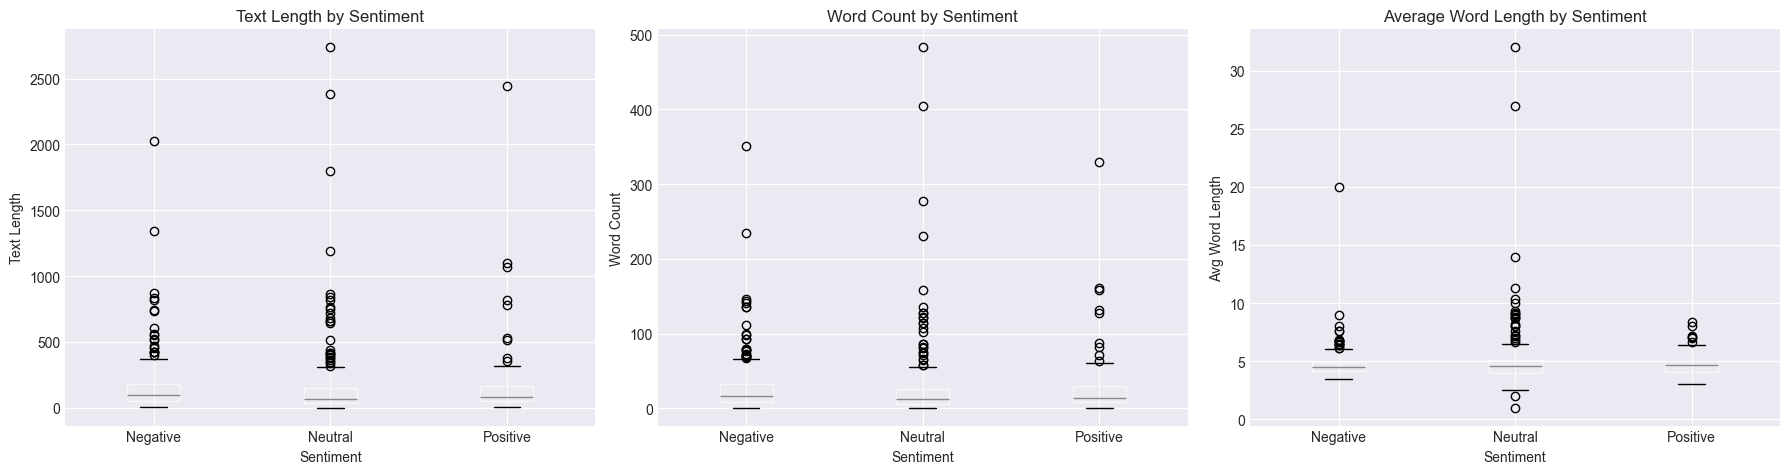

In [33]:
# Create features from text
X_balanced['text_length'] = X_balanced['text'].apply(len)
X_balanced['word_count'] = X_balanced['text'].apply(lambda x: len(str(x).split()))
X_balanced['avg_word_length'] = X_balanced['text'].apply(lambda x: np.mean([len(word) for word in str(x).split()]))

print("New features created:")
print(X_balanced[['text', 'text_length', 'word_count', 'avg_word_length']].head())

# Visualize feature distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

X_balanced.boxplot(column='text_length', by='sentiment_label', ax=axes[0])
axes[0].set_title('Text Length by Sentiment')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Text Length')

X_balanced.boxplot(column='word_count', by='sentiment_label', ax=axes[1])
axes[1].set_title('Word Count by Sentiment')
axes[1].set_xlabel('Sentiment')
axes[1].set_ylabel('Word Count')

X_balanced.boxplot(column='avg_word_length', by='sentiment_label', ax=axes[2])
axes[2].set_title('Average Word Length by Sentiment')
axes[2].set_xlabel('Sentiment')
axes[2].set_ylabel('Avg Word Length')

plt.suptitle('')
plt.tight_layout()
plt.show()


### 4.4 Text Transformation - Tokenization

Transform text into tokens and create document-term matrix


In [34]:
# Tokenize text using NLTK
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Get English stopwords
stop_words = set(stopwords.words('english'))

def tokenize_text(text):
    """Tokenize and clean text"""
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove punctuation and stopwords
    tokens = [word for word in tokens if word not in string.punctuation and word not in stop_words]
    return tokens

# Apply tokenization
X_balanced['tokens'] = X_balanced['text'].apply(tokenize_text)

print("Tokenization example:")
print(f"Original text: {X_balanced['text'].iloc[0][:100]}...")
print(f"Tokens: {X_balanced['tokens'].iloc[0][:20]}...")


Tokenization example:
Original text: China has been preparing for this and this administration lies, is terrible at negotiating, and cann...
Tokens: ['china', 'preparing', 'administration', 'lies', 'terrible', 'negotiating', 'trusted', 'so-called', 'deals', 'administration', 'barely', 'treading', 'water', 'likely', 'bring', 'united', 'sates', 'deep', 'recession', 'whilst']...


In [35]:
# Create Document-Term Matrix using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
count_vect = CountVectorizer(max_features=100)  # Limit to top 100 words for Phase 1
X_counts = count_vect.fit_transform(X_balanced['text'])

# Get vocabulary
vocabulary = count_vect.get_feature_names_out()

# Create DataFrame
term_doc_matrix = pd.DataFrame(X_counts.toarray(), columns=vocabulary)
term_doc_matrix['sentiment_label'] = X_balanced['sentiment_label'].values

print("Document-Term Matrix shape:", term_doc_matrix.shape)
print("\nFirst 5 rows (first 10 terms):")
print(term_doc_matrix.iloc[:5, :10])


Document-Term Matrix shape: (708, 101)

First 5 rows (first 10 terms):
   about  after  all  also  an  and  any  are  as  at
0      0      0    0     0   1    4    0    0   0   1
1      0      0    0     0   0    0    0    0   0   0
2      0      0    0     0   0    0    0    0   0   0
3      0      0    0     0   0    0    0    0   0   2
4      0      0    0     0   0    0    0    0   0   0


## 5. Data Visualization and Exploration

Create meaningful visualizations to understand the data better


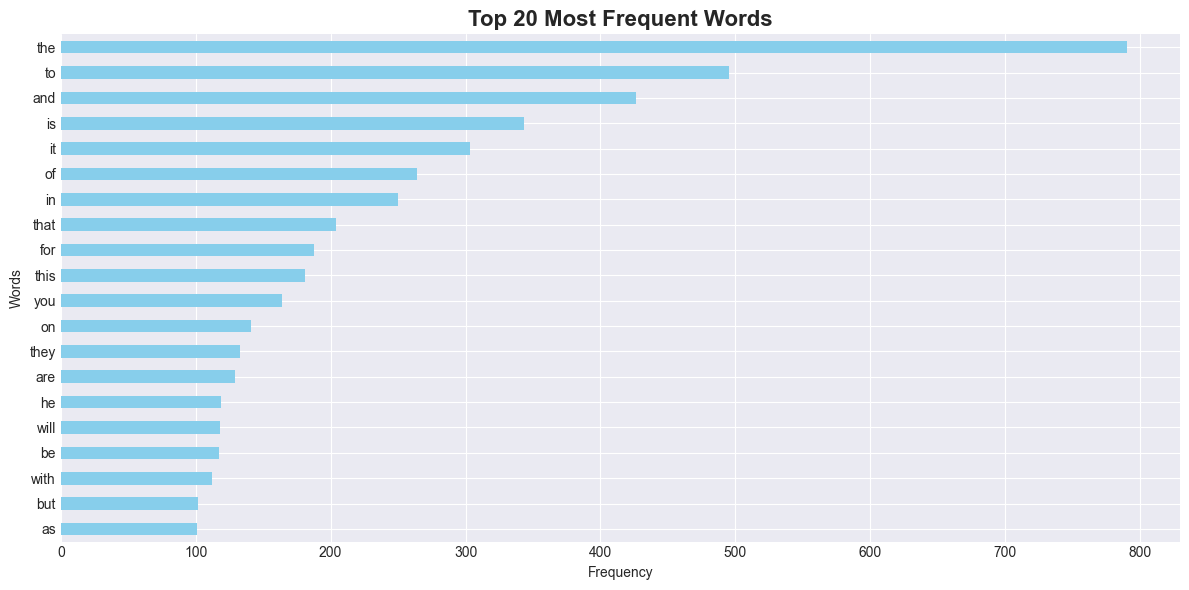

In [36]:
# Visualization 1: Top 20 most frequent words overall
word_freq = term_doc_matrix.drop('sentiment_label', axis=1).sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
word_freq.plot(kind='barh', color='skyblue')
plt.title('Top 20 Most Frequent Words', fontsize=16, fontweight='bold')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


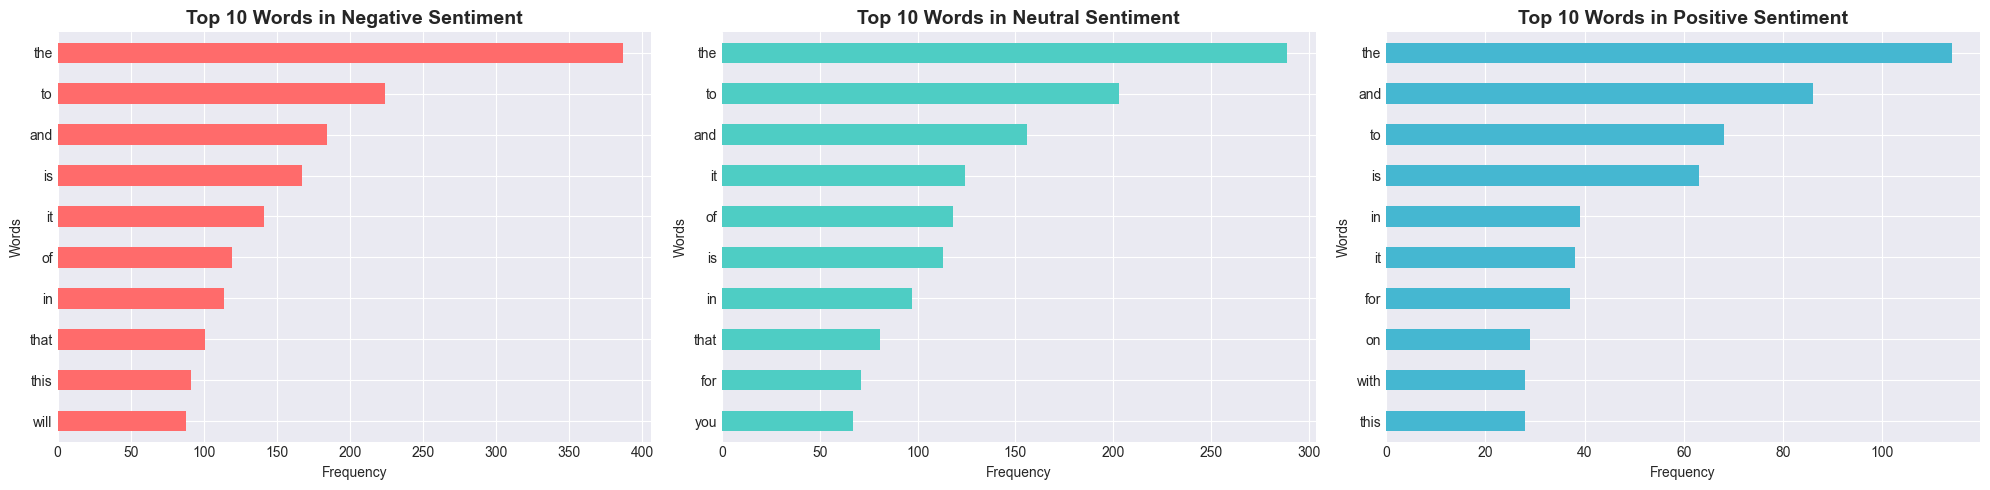

In [37]:
# Visualization 2: Word frequency by sentiment category
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for idx, sentiment in enumerate(['Negative', 'Neutral', 'Positive']):
    sentiment_data = term_doc_matrix[term_doc_matrix['sentiment_label'] == sentiment].drop('sentiment_label', axis=1)
    top_words = sentiment_data.sum().sort_values(ascending=False).head(10)
    
    top_words.plot(kind='barh', ax=axes[idx], color=['#FF6B6B', '#4ECDC4', '#45B7D1'][idx])
    axes[idx].set_title(f'Top 10 Words in {sentiment} Sentiment', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Frequency')
    axes[idx].set_ylabel('Words')
    axes[idx].invert_yaxis()

plt.tight_layout()
plt.show()


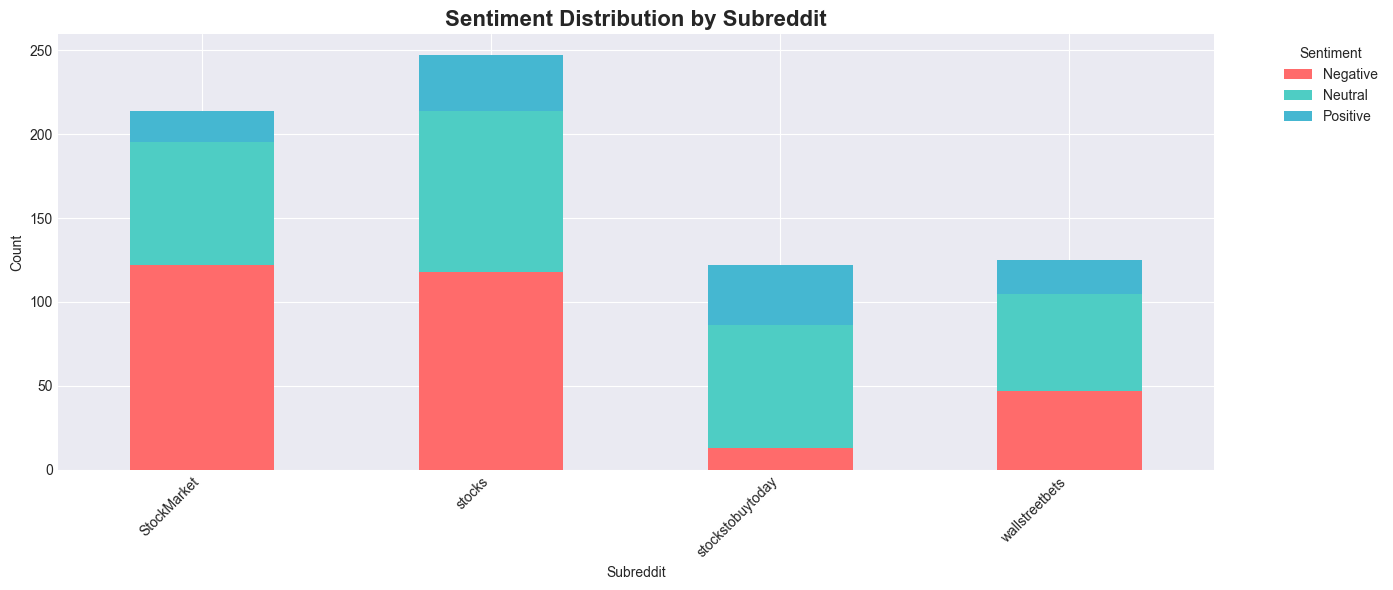

In [38]:
# Visualization 3: Subreddit distribution by sentiment
subreddit_sentiment = X_balanced.groupby(['subreddit', 'sentiment_label']).size().unstack(fill_value=0)

subreddit_sentiment.plot(kind='bar', stacked=True, figsize=(14, 6), 
                          color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('Sentiment Distribution by Subreddit', fontsize=16, fontweight='bold')
plt.xlabel('Subreddit')
plt.ylabel('Count')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [39]:
# Visualization 4: Interactive Plotly visualization - Post type distribution
type_sentiment = X_balanced.groupby(['type', 'sentiment_label']).size().reset_index(name='count')

fig = px.bar(type_sentiment, x='type', y='count', color='sentiment_label',
             title='Sentiment Distribution by Post Type',
             labels={'count': 'Number of Posts', 'type': 'Post Type', 'sentiment_label': 'Sentiment'},
             color_discrete_map={'Negative': '#FF6B6B', 'Neutral': '#4ECDC4', 'Positive': '#45B7D1'},
             barmode='group')

fig.update_layout(height=500, showlegend=True)
fig.show()


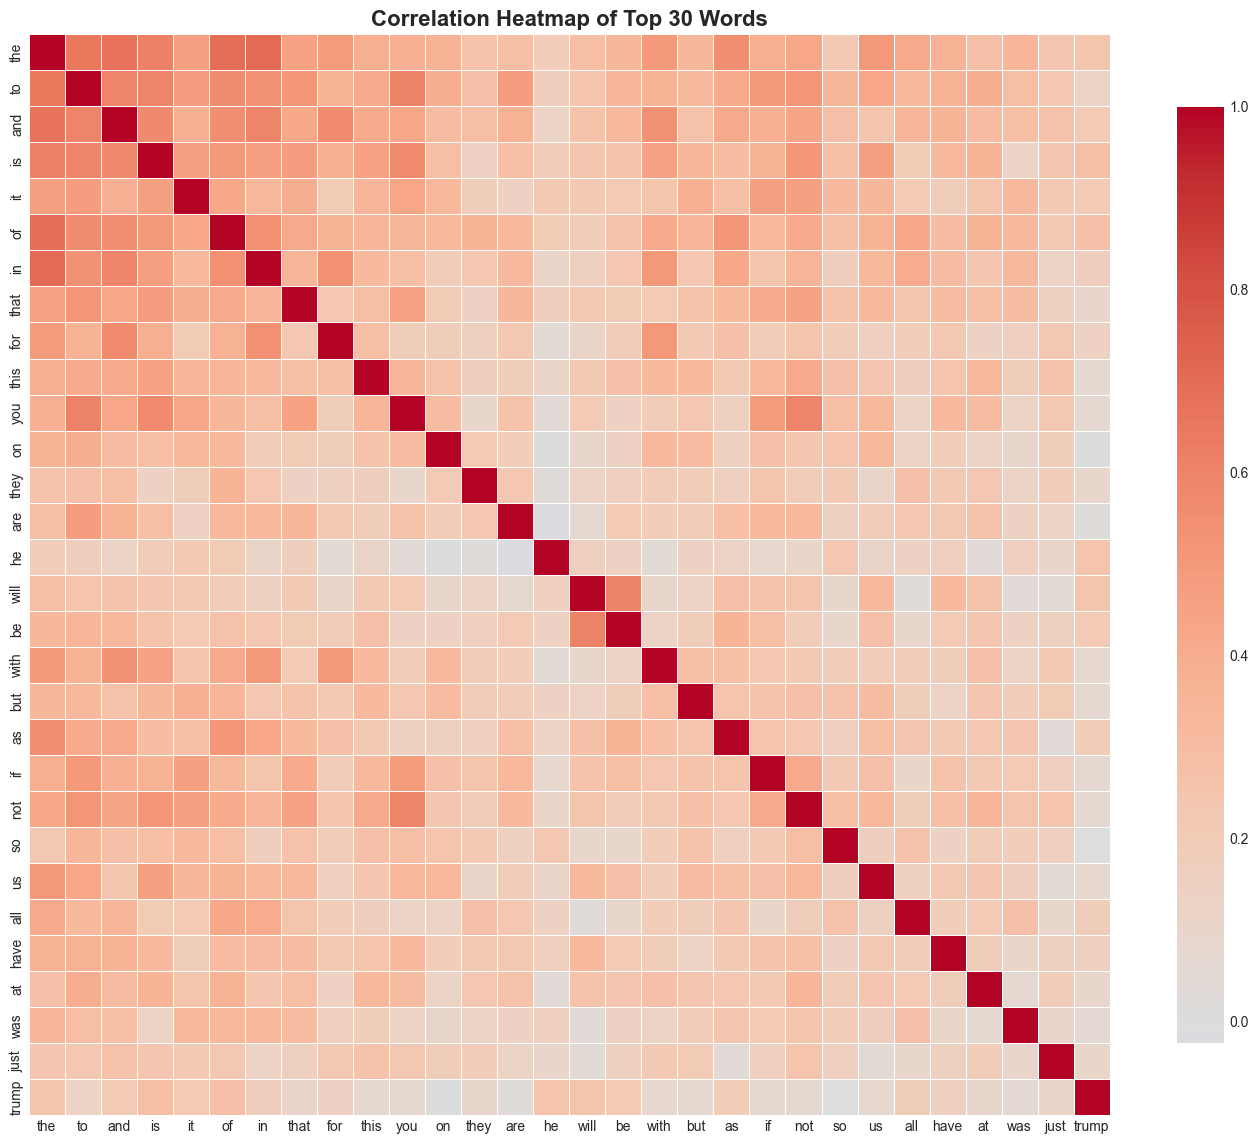

In [40]:
# Visualization 5: Correlation heatmap of top words
top_30_words = term_doc_matrix.drop('sentiment_label', axis=1).sum().sort_values(ascending=False).head(30).index
correlation_matrix = term_doc_matrix[top_30_words].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Top 30 Words', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [41]:
# Visualization 6: Text length and word count distribution
fig = make_subplots(rows=1, cols=2, subplot_titles=('Text Length Distribution', 'Word Count Distribution'))

# Text length histogram
for sentiment in ['Negative', 'Neutral', 'Positive']:
    data = X_balanced[X_balanced['sentiment_label'] == sentiment]['text_length']
    fig.add_trace(go.Histogram(x=data, name=sentiment, opacity=0.7), row=1, col=1)

# Word count histogram
for sentiment in ['Negative', 'Neutral', 'Positive']:
    data = X_balanced[X_balanced['sentiment_label'] == sentiment]['word_count']
    fig.add_trace(go.Histogram(x=data, name=sentiment, opacity=0.7, showlegend=False), row=1, col=2)

fig.update_layout(height=400, title_text="Text Statistics by Sentiment", barmode='overlay')
fig.update_xaxes(title_text="Text Length", row=1, col=1)
fig.update_xaxes(title_text="Word Count", row=1, col=2)
fig.update_yaxes(title_text="Frequency", row=1, col=1)
fig.update_yaxes(title_text="Frequency", row=1, col=2)
fig.show()


## 6. Summary of Phase 1

### Key Findings:

1. **Data Cleaning**: Successfully handled missing values and removed duplicates
2. **Sentiment Distribution**: Analyzed the distribution of sentiments across the dataset
3. **Feature Engineering**: Created meaningful features like text length, word count, and average word length
4. **Text Processing**: Tokenized text and created document-term matrix
5. **Visualizations**: Generated various visualizations to understand data patterns

### Dataset Statistics:
- Final cleaned dataset size
- Sentiment distribution
- Top frequent words per sentiment
- Subreddit and post type patterns

---

**End of Phase 1**


In [42]:
# Final Phase 1 Summary Statistics
print("=" * 60)
print("PHASE 1 SUMMARY STATISTICS")
print("=" * 60)
print(f"\n1. Dataset Size:")
print(f"   - Original dataset: {len(df)} records")
print(f"   - After cleaning: {len(X)} records")
print(f"   - Balanced dataset: {len(X_balanced)} records")

print(f"\n2. Sentiment Distribution (Balanced):")
print(X_balanced['sentiment_label'].value_counts().to_string())

print(f"\n3. Text Statistics (Balanced Dataset):")
print(f"   - Average text length: {X_balanced['text_length'].mean():.2f} characters")
print(f"   - Average word count: {X_balanced['word_count'].mean():.2f} words")
print(f"   - Average word length: {X_balanced['avg_word_length'].mean():.2f} characters")

print(f"\n4. Document-Term Matrix:")
print(f"   - Shape: {term_doc_matrix.shape}")
print(f"   - Vocabulary size: {len(vocabulary)} words")

print(f"\n5. Top 5 Most Frequent Words:")
top_5_words = term_doc_matrix.drop('sentiment_label', axis=1).sum().sort_values(ascending=False).head(5)
for word, freq in top_5_words.items():
    print(f"   - {word}: {int(freq)} occurrences")

print("\n" + "=" * 60)
print("Phase 1 Completed Successfully!")
print("=" * 60)


PHASE 1 SUMMARY STATISTICS

1. Dataset Size:
   - Original dataset: 847 records
   - After cleaning: 824 records
   - Balanced dataset: 708 records

2. Sentiment Distribution (Balanced):
sentiment_label
Negative    300
Neutral     300
Positive    108

3. Text Statistics (Balanced Dataset):
   - Average text length: 150.26 characters
   - Average word count: 26.42 words
   - Average word length: 4.78 characters

4. Document-Term Matrix:
   - Shape: (708, 101)
   - Vocabulary size: 100 words

5. Top 5 Most Frequent Words:
   - the: 790 occurrences
   - to: 495 occurrences
   - and: 426 occurrences
   - is: 343 occurrences
   - it: 303 occurrences

Phase 1 Completed Successfully!


# Phase 2

In [43]:
### Begin Assignment Here